# **Modelling**

In [31]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Memanggil data yang berada di Google Drive
df = pd.read_csv('/content/drive/MyDrive/Colab/(7)Hasil_Labelling.csv', keep_default_na=False)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,tanggal,ulasan,username,cleaning,normalization,stopword,stemming,tokenizing,translation,sentimen
0,30 Jan 2025,Kok bisa yah anggaran 1 2T cuma bisa bikin web...,velvsx,kok bisa yah anggaran t cuma bisa bikin web se...,kok bisa ya anggaran t cuma bisa bikin web sem...,ya anggaran t bikin web coretax kayak diaksesp...,ya anggar t bikin web coretax kayak akses luar...,"['ya', 'anggar', 't', 'bikin', 'web', 'coretax...","['yes', 'fencing', 't', 'make', 'web', 'coreta...",positif
1,30 Jan 2025,Baru muji coretax lancar abis itu gak bisa bua...,labakotor,baru muji coretax lancar abis itu gak bisa bua...,baru muji coretax lancar habis itu enggak bisa...,muji coretax lancar habis faktur page nya blan...,muji coretax lancar habis faktur page nya blan...,"['muji', 'coretax', 'lancar', 'habis', 'faktur...","['Muji', 'Coretax', 'smooth', 'finished', 'inv...",positif
2,29 Jan 2025,Coretax itu mirip sama Tugas Akhir mahasiswa S...,HebatPaijo,coretax itu mirip sama tugas akhir mahasiswa s...,coretax itu mirip sama tugas akhir mahasiswa s...,coretax tugas mahasiswa sistem informasi bentu...,coretax tugas mahasiswa sistem informasi bentu...,"['coretax', 'tugas', 'mahasiswa', 'sistem', 'i...","['coretax', 'assignments', 'student', 'system'...",negatif
3,25 Jan 2025,terpantau hari ini coretax lancar jaya @kring_...,na7ahachikyu,terpantau hari ini coretax lancar jaya moga ha...,terpantau hari ini coretax lancar jaya moga ha...,terpantau coretax lancar jaya moga harihari ja...,pantau coretax lancar jaya moga harihari jam k...,"['pantau', 'coretax', 'lancar', 'jaya', 'moga'...","['monitor', 'Coretax', 'smooth', 'jaya', 'moga...",positif
4,24 Jan 2025,coretax gak jelas. ngehambat semua orang buat ...,saturncz,coretax gak jelas ngehambat semua orang buat k...,coretax enggak jelas ngehambat semua orang bua...,coretax ngehambat orang kerja kalo aplikasinya...,coretax ngehambat orang kerja kalo aplikasi ma...,"['coretax', 'ngehambat', 'orang', 'kerja', 'ka...","['Coretax', 'Hanging', 'People', 'Work', 'If',...",positif


In [32]:
# Cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13413 entries, 0 to 13412
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tanggal        13413 non-null  object
 1   ulasan         13413 non-null  object
 2   username       13413 non-null  object
 3   cleaning       13413 non-null  object
 4   normalization  13413 non-null  object
 5   stopword       13413 non-null  object
 6   stemming       13413 non-null  object
 7   tokenizing     13413 non-null  object
 8   translation    13413 non-null  object
 9   sentimen       13413 non-null  object
dtypes: object(10)
memory usage: 1.0+ MB


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split data 90:10, 80:20, 70:30, 60:40
Train_X, Test_X, Train_Y, Test_Y = train_test_split(
    df['tokenizing'], df['sentimen'], test_size=0.2, random_state=42
)

# Encode label sentimen
label_encoder = LabelEncoder()
Train_Y = label_encoder.fit_transform(Train_Y)
Test_Y = label_encoder.transform(Test_Y)

# Cek jumlah data
total_data = len(df)
print("Jumlah data latih:", len(Train_X), f"({(len(Train_X)/total_data)*100:.2f}%)")
print("Jumlah data uji:", len(Test_X), f"({(len(Test_X)/total_data)*100:.2f}%)")

# TF-IDF Vectorization
tfidf_vect = TfidfVectorizer(max_features=5000)
tfidf_vect.fit(df['tokenizing'])

Train_X_Tfidf = tfidf_vect.transform(Train_X)
Test_X_Tfidf = tfidf_vect.transform(Test_X)

# Inisialisasi dan latih SVM
clf = SVC(kernel='linear')
clf.fit(Train_X_Tfidf, Train_Y)

# Prediksi label
predictions_SVM_Tfidf = clf.predict(Test_X_Tfidf)

# Evaluasi akurasi
accuracy_tfidf = accuracy_score(Test_Y, predictions_SVM_Tfidf) * 100
print('SVM Accuracy Score ->', round(accuracy_tfidf, 2), '%')

Jumlah data latih: 10730 (80.00%)
Jumlah data uji: 2683 (20.00%)
SVM Accuracy Score -> 88.59 %


# **Evaluation**

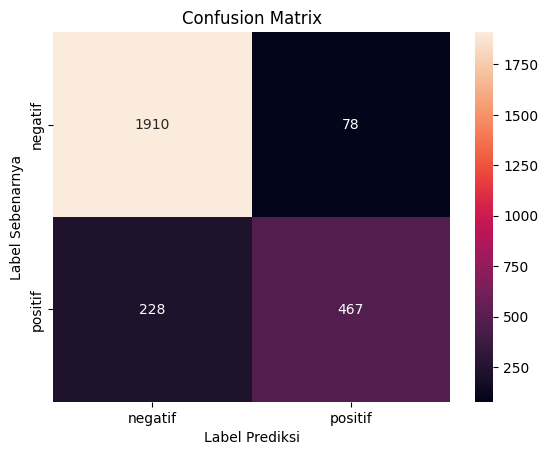


Classification Report:

              precision    recall  f1-score   support

     negatif       0.89      0.96      0.93      1988
     positif       0.86      0.67      0.75       695

    accuracy                           0.89      2683
   macro avg       0.88      0.82      0.84      2683
weighted avg       0.88      0.89      0.88      2683



In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat confusion matrix
conf_mat = confusion_matrix(Test_Y, predictions_SVM_Tfidf)

# Mendefinisikan kelas labels
class_labels = label_encoder.classes_

# Membuat dataframe dari confusion matrix
confusion_df = pd.DataFrame(conf_mat, index=class_labels, columns=class_labels)

# Plot confusion matrix menggunakan heatmap
sns.heatmap(confusion_df, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Label Prediksi")
plt.ylabel("Label Sebenarnya")
plt.show()

# Menghitung classification report
report = classification_report(Test_Y, predictions_SVM_Tfidf, target_names=class_labels)
print("\nClassification Report:\n")
print(report)

In [19]:
total_data = 13413

df_akurasi = pd.DataFrame([
    {'No': 1, 'Rasio': '90:10', 'Data Latih': int(0.9 * total_data), 'Data Uji': int(0.1 * total_data), 'Akurasi (%)': 88.00},
    {'No': 2, 'Rasio': '80:20', 'Data Latih': int(0.8 * total_data), 'Data Uji': int(0.2 * total_data), 'Akurasi (%)': 88.59},
    {'No': 3, 'Rasio': '70:30', 'Data Latih': int(0.7 * total_data), 'Data Uji': int(0.3 * total_data), 'Akurasi (%)': 88.20},
    {'No': 4, 'Rasio': '60:40', 'Data Latih': int(0.6 * total_data), 'Data Uji': int(0.4 * total_data), 'Akurasi (%)': 87.85}
])

df_akurasi.to_csv('/content/drive/MyDrive/Colab/Hasil Rasio.csv', index=False)
df_akurasi.head()

,No,Rasio,Data Latih,Data Uji,Akurasi (%)
0,1,90:10,12071,1341,88.00
1,2,80:20,10730,2682,88.59
2,3,70:30,9389,4023,88.20
3,4,60:40,8047,5365,87.85


In [20]:
df= pd.DataFrame({
    'Actual': label_encoder.inverse_transform(Test_Y),
    'Predicted': label_encoder.inverse_transform(predictions_SVM_Tfidf)
})

df.to_csv('/content/drive/MyDrive/Colab/Hasil Aktual Prediksi.csv', index=False)
df.head()

,Actual,Predicted
0,negatif,negatif
1,negatif,negatif
2,negatif,negatif
3,negatif,negatif
4,negatif,negatif
